In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
youtube = pd.read_csv('youtube_data.csv', header=0, names=['rank', 'grade', 'channel_name', 'video_uploads', 'subscribers', 'video_views'])
youtube[['subscribers']] = youtube['subscribers'].str.replace('-- ', '0')
youtube['subscribers'] = youtube['subscribers'].astype(int)
youtube[['video_uploads']] = youtube['video_uploads'].str.replace('--', '0')
youtube['video_uploads'] = youtube['video_uploads'].astype(int)
youtube = youtube[youtube.subscribers != 0]
youtube = youtube[youtube.video_uploads != 0]
youtube = youtube.sample(frac=.25)
youtube.head()

,rank,grade,channel_name,video_uploads,subscribers,video_views
2581,"2,582nd",B+,TroyeSivanVEVO,64,2781631,603986750
3111,"3,112th",B+,Momentos Divertidos,374,954280,248754238
3249,"3,250th",B+,KUN,5061,597210,408776906
572,573rd,A,NAGASWARA Official Video |…,1220,3193506,1667607612
1424,"1,425th",A-,50CentVEVO,63,4718895,3464225247


In [22]:
youtube.count()

rank             1152
grade            1152
channel_name     1152
video_uploads    1152
subscribers      1152
video_views      1152
dtype: int64

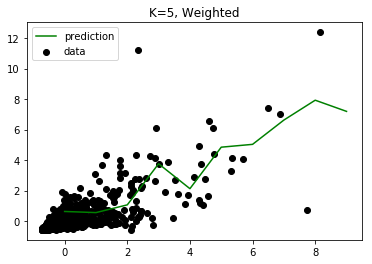

In [24]:
from sklearn import neighbors
from scipy import stats

knn = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
X = pd.DataFrame({
    'subscribers': stats.zscore(youtube.subscribers)
})
Y = pd.DataFrame({
    'video_views': stats.zscore(youtube.video_views)
})
knn.fit(X, Y)

T = np.arange(0, 10, 1)[:, np.newaxis]

Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=5, Weighted')
plt.show()

In [25]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print('Weighted Accuracy: %0.2f (+/- %0.2f)' % (score.mean(), score.std() * 2))

Weighted Accuracy: 0.26 (+/- 0.39)


Coefficients: 
 [[0.76978688]]
Intercept: 
 [-1.09381738e-17]

R-squared:
0.5925718410081262


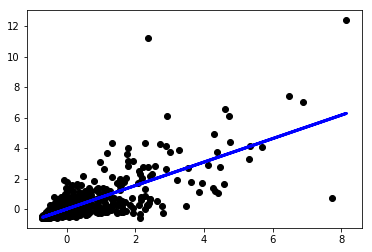

In [26]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

regr.fit(X, Y)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

plt.scatter(X, Y, color='black')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.show()

In [27]:
score_2 = cross_val_score(regr, X, Y, cv=5)
print('Weighted Accuracy: %0.2f (+/- %0.2f)' % (score_2.mean(), score_2.std() * 2))

Weighted Accuracy: 0.54 (+/- 0.20)


For this specific example, neither model is particularly good, although if I had to choose between the two I would probably pick KNN since it seems to account for a bit more of the excentricities of the data, and is way more custimizable.
<br><br>
OLSR seems better suited for quick and dirty regression where you just want to find a fit line.  OLSR is also, obviously, better if the relationship between the data is very linear and not scattered in any way.
<br>  <br>
KNN seems like it would be best suited to data that has a distinct shape (like a curve of some sort or a distinctive pattern).  KNN also seems like it would fair far better with data that has an upper and lower limit, or at least has a knowable pattern throughout the entire population range.  